In [293]:
# builtin
import importlib
# internal
import read_data
import train_model
import params
from tqdm.contrib.concurrent import process_map
# external
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
importlib.reload(params)
importlib.reload(read_data)
importlib.reload(train_model)

<module 'train_model' from '/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/train_model.py'>

### Test

In [295]:
print(params.all_para)

['0', 'MBA', 'LightGCN_tri', 0.005, 0.02, 2, 128, 10000, 4096, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'RMSProp', False, 'None', 'Sum', 128, 'SF', False]


In [296]:
read_data_res = read_data.read_all_data_tri(params.all_para)

Reading data...
Constructing the tripartite sparse graph...
Data all read successfully!


In [297]:
len(read_data_res)

12

In [298]:
light_tri_test_path = './experiment_result/MBA/LightGCN_tri/'
for save_path in ['MBA_LightGCN_tri_20240524_5.xlsx',]:
    F1_max = train_model.train_model(params.all_para[:26],
                                     read_data_res,
                                     light_tri_test_path + save_path,)

F1_max: 0.083559: 100%|██████████████████████████████████████████████| 300/300 [13:37<00:00,  2.73s/it]

time cost: 4.088320786459954
Saving results...
Well saved.


In [ ]:
# can it because of the optimizer?

## MBA

In [311]:
exp_res_dir = './experiment_result/MBA/'
lgcn_dir = exp_res_dir + 'LGCN/'
tri_lgcn_dir = exp_res_dir + 'LGCN_tri/'
tri_lgcn_approximated_dir = exp_res_dir + 'LGCN_tri_approach/'
light_dir = exp_res_dir + 'LightGCN/'# lgcn
lcfn_dir = exp_res_dir + 'LCFN/'
tri_light_dir = exp_res_dir + 'LightGCN_tri/'

lgcn_paths = [lgcn_dir + "MBA_LGCN_20240514_4.xlsx",
              lgcn_dir + "MBA_LGCN_20240514_5.xlsx",
              lgcn_dir + "MBA_LGCN_20240514_6.xlsx"]
lgcn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_paths]
lgcn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_paths]

# lgcn_tri
lgcn_tri_paths = [tri_lgcn_dir + "MBA_LGCN_tri_20240514_4.xlsx",
                  tri_lgcn_dir + "MBA_LGCN_tri_20240514_5.xlsx",
                  tri_lgcn_dir + "MBA_LGCN_tri_20240514_6.xlsx"]
lgcn_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_paths]
lgcn_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_paths]

# lgcn_tri_approximated 20%
# LGCN_tri_approach/10%_MBA/
lgcn_tri_app_paths = [tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_20240514_1.xlsx",
                  tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_20240514_2.xlsx",
                  tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_20240514_3.xlsx"]
lgcn_tri_app_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_paths]
lgcn_tri_app_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_paths]

# lgcn_tri_approximated 5%
lgcn_tri_app_005_paths = [tri_lgcn_approximated_dir + "5%_MBA/MBA_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "5%_MBA/MBA_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "5%_MBA/MBA_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_005_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_005_paths]
lgcn_tri_app_005_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_005_paths]

# lgcn_tri_approximated 10%
lgcn_tri_app_010_paths = [tri_lgcn_approximated_dir + "10%_MBA/MBA_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "10%_MBA/MBA_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "10%_MBA/MBA_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_010_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_010_paths]
lgcn_tri_app_010_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_010_paths]

# lgcn_tri_approximated 30%
lgcn_tri_app_030_paths = [tri_lgcn_approximated_dir + "30%_MBA/MBA_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "30%_MBA/MBA_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "30%_MBA/MBA_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_030_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_030_paths]
lgcn_tri_app_030_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_030_paths]

# light
light_f1_paths = [light_dir + "MBA_LightGCN_20240518_1.xlsx",
              light_dir + "MBA_LightGCN_20240518_2.xlsx",
              light_dir + "MBA_LightGCN_20240518_3.xlsx"]
light_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in light_f1_paths]
light_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in light_f1_paths]

# lcfn
lcfn_f1_paths = [lcfn_dir + "MBA_LCFN_20240518_1.xlsx",
              lcfn_dir + "MBA_LCFN_20240518_2.xlsx",
              lcfn_dir + "MBA_LCFN_20240518_3.xlsx"]
lcfn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lcfn_f1_paths]
lcfn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lcfn_f1_paths]

# fully random seeds
lgcn_tri_app_random_paths = [tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_fully_ramdom/MBA_LGCN_tri_approximated_20240519_1.xlsx",
                  tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_fully_ramdom/MBA_LGCN_tri_approximated_20240519_2.xlsx",
                  tri_lgcn_approximated_dir + "MBA_LGCN_tri_approximated_fully_ramdom/MBA_LGCN_tri_approximated_20240519_3.xlsx"]
lgcn_tri_app_random_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_random_paths]
lgcn_tri_app_random_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_random_paths]

# light_tri
light_tri_f1_paths = [
              tri_light_dir + "MBA_LightGCN_tri_20240524_4.xlsx"]
light_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in light_tri_f1_paths]
light_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in light_tri_f1_paths]

## Several Models Experiments

### Instacart LGCN

In [314]:
exp_res_dir = "./experiment_result/Instacart/"
lgcn_dir = exp_res_dir + "LGCN/"
tri_lgcn_dir = exp_res_dir + "LGCN_tri/"
tri_lgcn_approximated_dir = exp_res_dir + "LGCN_tri_approximated/"
light_dir = exp_res_dir + "LightGCN/"
lcfn_dir = exp_res_dir + 'LCFN/'
light_tri_dir = exp_res_dir + "LightGCN_tri/"

# lgcn
lgcn_paths = [lgcn_dir + "Instacart_LGCN_20240513_1.xlsx",
              lgcn_dir + "Instacart_LGCN_20240513_5.xlsx",
              lgcn_dir + "Instacart_LGCN_20240513_7.xlsx"]
lgcn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_paths]
lgcn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_paths]

# lgcn_tri
lgcn_tri_paths = [tri_lgcn_dir + "Instacart_LGCN_tri_20240513_1.xlsx",
                  tri_lgcn_dir + "Instacart_LGCN_tri_20240513_2.xlsx",
                  tri_lgcn_dir + "Instacart_LGCN_tri_20240513_3.xlsx"]
lgcn_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_paths]
lgcn_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_paths]

# lgcn_tri_approximated 20%
lgcn_tri_app_paths = [tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_1.xlsx",
                  tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_2.xlsx",
                  tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_3.xlsx"]
lgcn_tri_app_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_paths]
lgcn_tri_app_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_paths]

# lgcn_tri_approximated 10%
lgcn_tri_app_005_paths = [tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_005_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_005_paths]
lgcn_tri_app_005_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_005_paths]

# lgcn_tri_approximated 10%
lgcn_tri_app_010_paths = [tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_010_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_010_paths]
lgcn_tri_app_010_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_010_paths]

# lgcn_tri_approximated 30%
lgcn_tri_app_030_paths = [tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_030_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_030_paths]
lgcn_tri_app_030_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_030_paths]

# light
light_f1_paths = [light_dir + "Instacart_LightGCN_20240517_1.xlsx",
              light_dir + "Instacart_LightGCN_20240517_2.xlsx",
              light_dir + "Instacart_LightGCN_20240517_3.xlsx"]
light_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in light_f1_paths]
light_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in light_f1_paths]

# lcfn
lcfn_paths = [lcfn_dir + "Instacart_LCFN_20240518_1.xlsx",
              lcfn_dir + "Instacart_LCFN_20240518_2.xlsx",
              lcfn_dir + "Instacart_LCFN_20240518_3.xlsx"]
lcfn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lcfn_paths]
lcfn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lcfn_paths]

# lightgcn tri
light_tri_paths = [light_tri_dir + "Instacart_LightGCN_tri_20240527_1.xlsx",
                  light_tri_dir + "Instacart_LightGCN_tri_20240527_2.xlsx",
                  light_tri_dir + "Instacart_LightGCN_tri_20240527_3.xlsx"]
light_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in light_tri_paths]
light_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in light_tri_paths]

#### f1

In [315]:
# lgcn_f1_dfs[1].max(), lgcn_tri_f1_dfs[1].max(), lgcn_tri_app_f1_dfs[1].max(), lgcn_tri_app_f1_005_dfs[1].max()

a1(0%): [0.0373495  0.05545686 0.06481293 0.06852536 0.06268667 0.05148737]
a2(5%): [0.04087323 0.06026472 0.07103112 0.07491612 0.06779905 0.05543768]
a3(10%): [0.04035948 0.06005262 0.07124413 0.07528048 0.06817483 0.05563706]
a4(20%): [0.04133226 0.06044543 0.07185756 0.07533746 0.06794813 0.05520922]
a5(30%): [0.0416755  0.06102513 0.07164616 0.07534445 0.06779038 0.05549897]
a6(100%): [0.04108584 0.06108593 0.07220057 0.07584305 0.06805803 0.05565223]
a7(light): [0.03993006 0.05830253 0.06799449 0.0714755  0.06526102 0.05399583]
a8(lcfn): [0.03974094 0.0574296  0.06572055 0.06953557 0.06261451 0.05104329]
a9(random): [0.09971604 0.12625366 0.14001655 0.13568493 0.11451921 0.09192603]
a10(light3): [0.04018354 0.05864532 0.06828574 0.07207586 0.06561513 0.05423537]
approach (5%)	 improved rate from	 baseline: [0.0943445  0.08669555 0.09594059 0.09326115 0.08155438 0.07672386]
approach (10%)	 improved rate from	 baseline: [0.08058953 0.08287099 0.09922715 0.09857836 0.08754906 0.0805

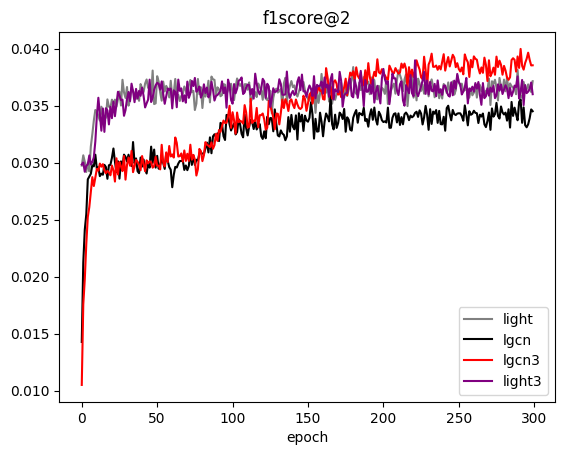

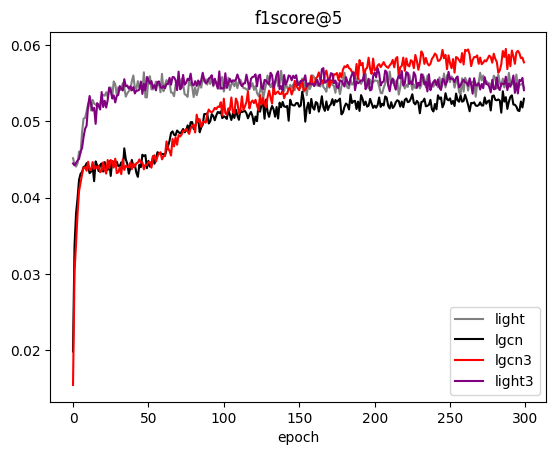

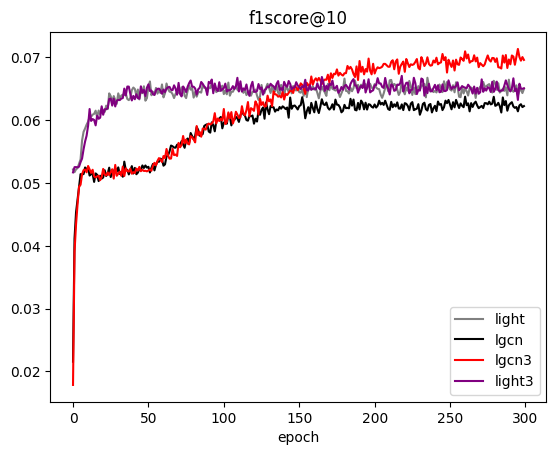

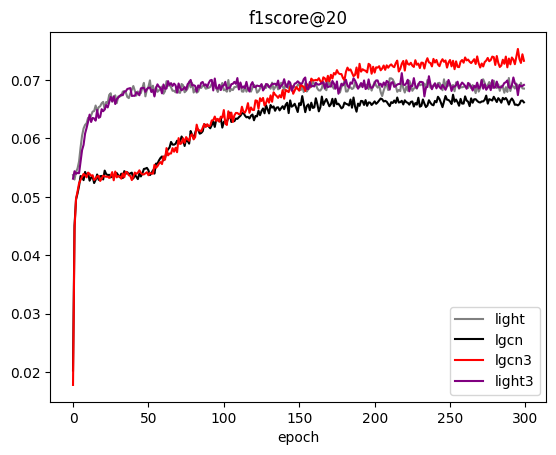

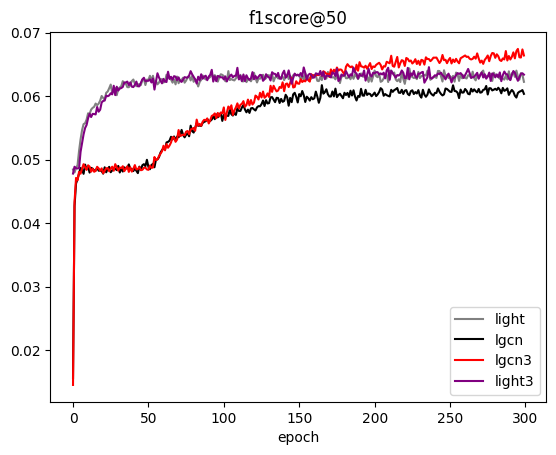

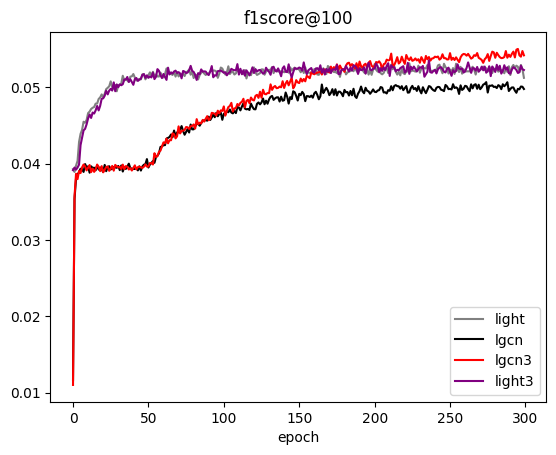

In [318]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_f1_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_005_f1_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_010_f1_dfs], axis=0)
a4 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_f1_dfs], axis=0)
a5 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_030_f1_dfs], axis=0)
a6 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_f1_dfs], axis=0)
a7 = np.mean([df.max().tolist()[1:] for df in light_f1_dfs], axis=0)
a8 = np.mean([df.max().tolist()[1:] for df in lcfn_f1_dfs], axis=0)
a9 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_random_f1_dfs], axis=0)
a10 = np.mean([df.max().tolist()[1:] for df in light_tri_f1_dfs], axis=0)

print(f'a1(0%): {a1}')
print(f'a2(5%): {a2}')
print(f'a3(10%): {a3}')
print(f'a4(20%): {a4}')
print(f'a5(30%): {a5}')
print(f'a6(100%): {a6}')
print(f'a7(light): {a7}')
print(f'a8(lcfn): {a8}')
print(f'a9(random): {a9}')
print(f'a10(light3): {a10}')

print(f'approach (5%)\t improved rate from\t baseline: {a2/a1-1}')
print(f'approach (10%)\t improved rate from\t baseline: {a3/a1-1}')
print(f'approach (20%)\t improved rate from\t baseline: {a4/a1-1}')
print(f'approach (30%)\t improved rate from\t baseline: {a5/a1-1}')
print(f'full\t\t improved rate from\t baseline: {a6/a1-1}')
print(f'full\t\t improved rate from\t light: {a6/a7-1}')
print(f'full\t\t improved rate from\t lcfn: {a6/a8-1}')
print(f'approach (20%)\t\t improved rate from\t random: {a4/a9-1}')
print(f'light3\t\t improved rate from\t light: {a10/a7-1}')

# print(f'full\t\t improved rate from\t approach: {a3/a2-1}')
# print(f'approach\t improved rate from\t full: {a2/a3-1}')

# 2. draw avg(f1) v.s. epoch number
for k in [2,5,10,20,50,100]:
    light_f1_lines = [df[k].tolist() for df in light_f1_dfs]
    light_f1_mean = np.mean(light_f1_lines, axis=0)
    plt.plot(light_f1_mean, label='light', color='grey')
    # for line in light_f1_lines:
    #     plt.plot(line, label='light', color='b')
    
    lgcn_f1_lines = [df[k].tolist() for df in lgcn_f1_dfs]
    lgcn_f1_mean = np.mean(lgcn_f1_lines, axis=0)
    plt.plot(lgcn_f1_mean, label='lgcn', color='black')
    # for line in lgcn_f1_lines:
    #     plt.plot(line, label='lgcn', color='b')

    lgcn_tri_f1_lines = [df[k].tolist() for df in lgcn_tri_f1_dfs]
    lgcn_tri_f1_mean = np.mean(lgcn_tri_f1_lines, axis=0)
    plt.plot(lgcn_tri_f1_mean, label='lgcn3', color='red')
    # for line in lgcn_tri_f1_lines:
    #     plt.plot(line, label='lgcn_tri', color='r')

    # lgcn_tri_app_f1_lines = [df[k].tolist() for df in lgcn_tri_app_f1_dfs]
    # lgcn_tri_app_f1_mean = np.mean(lgcn_tri_app_f1_lines, axis=0)
    # plt.plot(lgcn_tri_app_f1_mean, label='lgcn_tri (approximated 20%)', color='orange')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_005_f1_lines = [df[k].tolist() for df in lgcn_tri_app_005_f1_dfs]
    # lgcn_tri_app_005_f1_mean = np.mean(lgcn_tri_app_005_f1_lines, axis=0)
    # plt.plot(lgcn_tri_app_005_f1_mean, label='lgcn_tri (approximated 5%)', color='yellow')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_010_f1_lines = [df[k].tolist() for df in lgcn_tri_app_010_f1_dfs]
    # lgcn_tri_app_010_f1_mean = np.mean(lgcn_tri_app_010_f1_lines, axis=0)
    # plt.plot(lgcn_tri_app_010_f1_mean, label='lgcn_tri (approximated 10%)', color='grey')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    light_tri_f1_lines = [df[k].tolist() for df in light_tri_f1_dfs]
    light_tri_f1_mean = np.mean(light_tri_f1_lines, axis=0)
    plt.plot(light_tri_f1_mean, label='light3', color='purple')
    # for line in light_tri_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')
    
    plt.legend()
    plt.title(f'f1score@{k}')
    plt.xlabel('epoch')
    plt.show()

#### ndcg

In [306]:
# lgcn_ndcg_dfs[1].max(), lgcn_tri_ndcg_dfs[1].max(), lgcn_tri_app_ndcg_dfs[1].max()

a1(0%): [0.25591432 0.22405696 0.2163975  0.22600687 0.2632016  0.30183666]
a2(5%): [0.27566121 0.24481442 0.23303259 0.24331399 0.27874724 0.31734444]
a3(10%): [0.28301159 0.24403004 0.23359596 0.24266175 0.28197886 0.32091238]
a4(20%): [0.28483271 0.24677304 0.23534865 0.24394539 0.28351968 0.32253141]
a5(30%): [0.2816816  0.2439397  0.23394158 0.23993712 0.27938893 0.3185881 ]
a6(100%): [0.27944825 0.24465594 0.23589342 0.24156002 0.28039278 0.31954965]
a7(light): [0.27280175 0.24206026 0.23637577 0.25032456 0.28747369 0.32555393]
a7(lcfn): [0.22399224 0.1957763  0.18811953 0.19687168 0.23171238 0.27142178]
approach (5%)	 improved rate from	 baseline: [0.07716208 0.09264366 0.07687286 0.07657785 0.05906364 0.05137805]
approach (10%)	 improved rate from	 baseline: [0.10588411 0.08914287 0.07947624 0.07369193 0.07134176 0.06319882]
approach (20%)	 improved rate from	 baseline: [0.11300024 0.10138526 0.08757563 0.07937161 0.07719589 0.06856276]
approach (30%)	 improved rate from	 basel

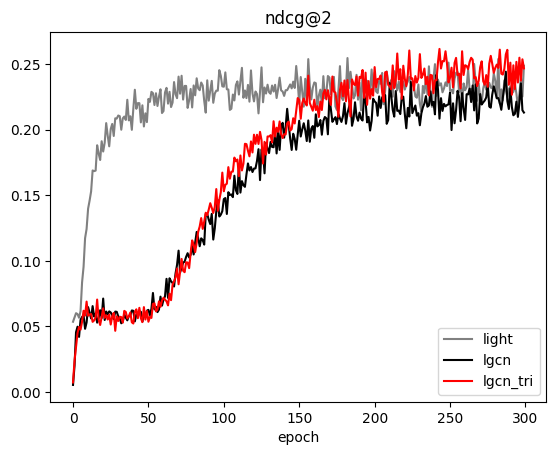

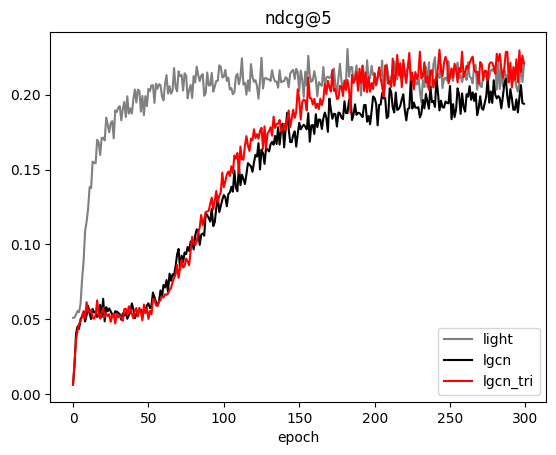

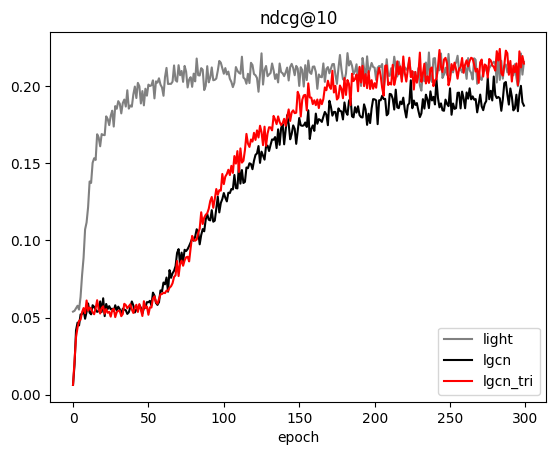

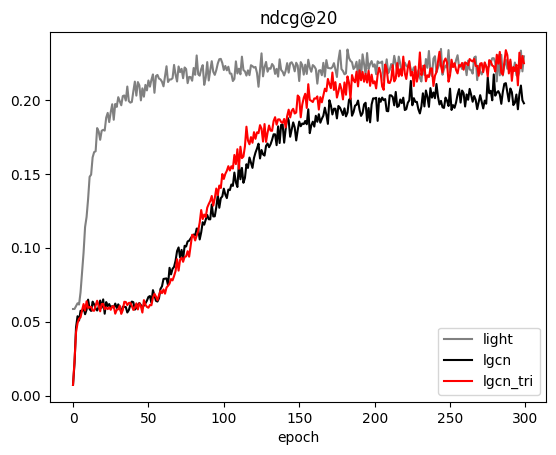

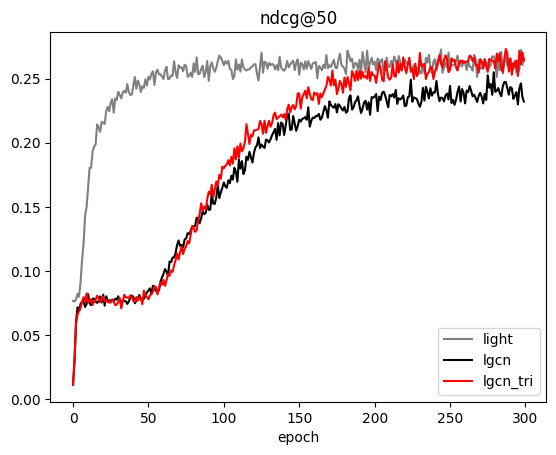

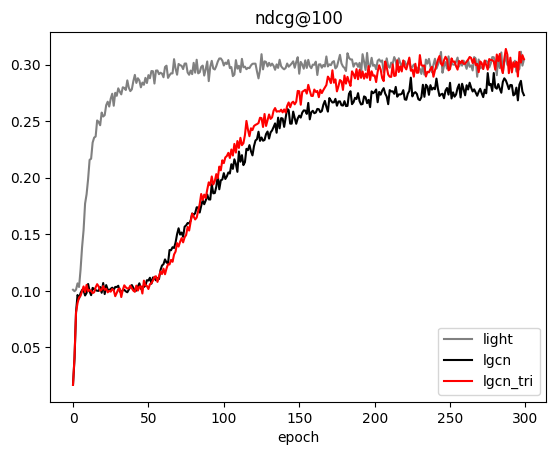

In [313]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_ndcg_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_005_ndcg_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_010_ndcg_dfs], axis=0)
a4 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_ndcg_dfs], axis=0)
a5 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_030_ndcg_dfs], axis=0)
a6 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_ndcg_dfs], axis=0)
a7 = np.mean([df.max().tolist()[1:] for df in light_ndcg_dfs], axis=0)
a8 = np.mean([df.max().tolist()[1:] for df in lcfn_ndcg_dfs], axis=0)

print(f'a1(0%): {a1}')
print(f'a2(5%): {a2}')
print(f'a3(10%): {a3}')
print(f'a4(20%): {a4}')
print(f'a5(30%): {a5}')
print(f'a6(100%): {a6}')
print(f'a7(light): {a7}')
print(f'a7(lcfn): {a8}')

print(f'approach (5%)\t improved rate from\t baseline: {a2/a1-1}')
print(f'approach (10%)\t improved rate from\t baseline: {a3/a1-1}')
print(f'approach (20%)\t improved rate from\t baseline: {a4/a1-1}')
print(f'approach (30%)\t improved rate from\t baseline: {a5/a1-1}')
print(f'full\t\t improved rate from\t baseline: {a6/a1-1}')
print(f'full\t\t improved rate from\t light: {a6/a7-1}')
print(f'full\t\t improved rate from\t lcfn: {a6/a8-1}')

# print(f'full improved rate from approach: {a3/a2-1}')
# print(f'approach improved rate from full: {a2/a3-1}')

# 2. draw avg(ndcg) v.s. epoch number
for k in [2,5,10,20,50,100]:
    light_ndcg_lines = [df[k].tolist() for df in light_ndcg_dfs]
    light_ndcg_mean = np.mean(light_ndcg_lines, axis=0)
    plt.plot(light_ndcg_mean, label='light', color='grey')
    # for line in light_ndcg_lines:
    #     plt.plot(line, label='light', color='b')

    lgcn_ndcg_lines = [df[k].tolist() for df in lgcn_ndcg_dfs]
    lgcn_ndcg_mean = np.mean(lgcn_ndcg_lines, axis=0)
    plt.plot(lgcn_ndcg_mean, label='lgcn', color='black')
    # for line in lgcn_ndcg_lines:
    #     plt.plot(line, label='lgcn', color='b')

    lgcn_tri_ndcg_lines = [df[k].tolist() for df in lgcn_tri_ndcg_dfs]
    lgcn_tri_ndcg_lines_mean = np.mean(lgcn_tri_ndcg_lines, axis=0)
    plt.plot(lgcn_tri_ndcg_lines_mean, label='lgcn_tri', color='red')
    # for line in lgcn_tri_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri', color='r')

    # lgcn_tri_app_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_ndcg_dfs]
    # lgcn_tri_app_ndcg_mean = np.mean(lgcn_tri_app_ndcg_lines, axis=0)
    # plt.plot(lgcn_tri_app_ndcg_mean, label='lgcn_tri', color='orange')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_005_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_005_ndcg_dfs]
    # lgcn_tri_app_005_ndcg_mean = np.mean(lgcn_tri_app_005_ndcg_lines, axis=0)
    # plt.plot(lgcn_tri_app_005_ndcg_mean, label='lgcn_tri (approximated 5%)', color='yellow')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_010_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_010_ndcg_dfs]
    # lgcn_tri_app_010_ndcg_mean = np.mean(lgcn_tri_app_010_ndcg_lines, axis=0)
    # plt.plot(lgcn_tri_app_010_ndcg_mean, label='lgcn_tri (approximated 10%)', color='grey')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')
    
    
    plt.legend()
    plt.title(f'ndcg@{k}')
    plt.xlabel('epoch')
    plt.show()

### MBA LGCN

In [339]:
res_dir = './experiment_result/MBA/'
lgcn_dir = res_dir + "LGCN/"
tri_lgcn_dir = res_dir + "LGCN_tri/"
tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"

In [340]:
tri_lgcn_approximated_dir

'./experiment_result/MBA/LGCN_tri_approximated/'

In [341]:
os.chdir('./pretraining/')
! python3 _graph_embeddings_tri.py
os.chdir('../')

Reading data...
20
Initializing...
Constructing the laplacian matrices...
Decomposing the laplacian matrices...
[1.14275284e-15 5.07092710e-01 5.20606290e-01 5.80531600e-01
 5.89839010e-01 6.06265411e-01 6.14265853e-01 6.36832096e-01
 6.39457300e-01 6.43504740e-01]
Saving features...


In [342]:
assert params.all_para[2] == 'LGCN_tri' # model
assert params.all_para[1] == 'MBA' # dataset
read_data_res = read_data.read_all_data_tri(params.all_para, approximate=True)
print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading graph_embeddings_1d from path: dataset/MBA/graph_embeddings_1d_tri_approach.json
Reading data...
Data all read successfully!
pretrained embedding size: (8163, 128)
interaction number: 208956
['0', 'MBA', 'LGCN_tri', 0.0005, 0.02, 1, 128, 10000, 512, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'RMSProp', False, 'None', 'Sum', 128, 'SF', False]


In [ ]:
for exsl_path in ['MBA_LGCN_tri_approximated_20240519_1.xlsx', 'MBA_LGCN_tri_approximated_20240519_2.xlsx', 'MBA_LGCN_tri_approximated_20240519_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, tri_lgcn_approximated_dir + exsl_path)

### MBA LightGCN

In [276]:
res_dir = 'experiment_result/MBA/'
# lgcn_dir = res_dir + "LGCN/"
# tri_lgcn_dir = res_dir + "LGCN_tri/"
# tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"
light_gcn_dir = res_dir + "LightGCN/"

In [277]:
light_gcn_dir

'experiment_result/MBA/LightGCN/'

In [ ]:
# os.chdir('./pretraining/')
# ! python3 _graph_embeddings_tri.py
# os.chdir('../')

In [278]:
assert params.all_para[2] == 'LightGCN' # model
assert params.all_para[1] == 'MBA' # dataset
read_data_res = read_data.read_all_data_lightGCN(params.all_para)
# print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading data...
Constructing the sparse graph...
Data all read successfully!
interaction number: 208956
['0', 'MBA', 'LightGCN', 0.005, 0.02, 2, 128, 10000, 512, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'Adam', False, 'None', 'Sum', 128, 'SF', False]


## Instacart

In [74]:
exp_res_dir = "./experiment_result/Instacart/"
lgcn_dir = exp_res_dir + "LGCN/"
tri_lgcn_dir = exp_res_dir + "LGCN_tri/"
tri_lgcn_approximated_dir = exp_res_dir + "LGCN_tri_approximated/"

### analysis

In [75]:
# lgcn
lgcn_paths = [lgcn_dir + "Instacart_LGCN_20240513_1.xlsx",
              lgcn_dir + "Instacart_LGCN_20240513_5.xlsx",
              lgcn_dir + "Instacart_LGCN_20240513_7.xlsx"]
lgcn_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_paths]
lgcn_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_paths]

# lgcn_tri
lgcn_tri_paths = [tri_lgcn_dir + "Instacart_LGCN_tri_20240513_1.xlsx",
                  tri_lgcn_dir + "Instacart_LGCN_tri_20240513_2.xlsx",
                  tri_lgcn_dir + "Instacart_LGCN_tri_20240513_3.xlsx"]
lgcn_tri_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_paths]
lgcn_tri_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_paths]

# lgcn_tri_approximated 20%
lgcn_tri_app_paths = [tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_1.xlsx",
                  tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_2.xlsx",
                  tri_lgcn_approximated_dir + "Instacart_LGCN_tri_approximated_20240513_3.xlsx"]
lgcn_tri_app_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_paths]
lgcn_tri_app_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_paths]

# lgcn_tri_approximated 10%
lgcn_tri_app_005_paths = [tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "5%_instacart/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_005_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_005_paths]
lgcn_tri_app_005_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_005_paths]

# lgcn_tri_approximated 10%
lgcn_tri_app_010_paths = [tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "instacart_10%/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_010_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_010_paths]
lgcn_tri_app_010_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_010_paths]

# lgcn_tri_approximated 30%
lgcn_tri_app_030_paths = [tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_1.xlsx",
                  tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_2.xlsx",
                  tri_lgcn_approximated_dir + "30%_instacart/Instacart_LGCN_tri_approximated_20240515_3.xlsx"]
lgcn_tri_app_030_f1_dfs = [pd.read_excel(path, sheet_name='F1') for path in lgcn_tri_app_030_paths]
lgcn_tri_app_030_ndcg_dfs = [pd.read_excel(path, sheet_name='NDCG') for path in lgcn_tri_app_030_paths]

#### 1. compare f1

In [46]:
# lgcn_f1_dfs[1].max(), lgcn_tri_f1_dfs[1].max(), lgcn_tri_app_f1_dfs[1].max()

a1(0%): [0.0373495  0.05545686 0.06481293 0.06852536 0.06268667 0.05148737]
a2(5%): [0.04087323 0.06026472 0.07103112 0.07491612 0.06779905 0.05543768]
a3(10%): [0.04035948 0.06005262 0.07124413 0.07528048 0.06817483 0.05563706]
a4(20%): [0.04133226 0.06044543 0.07185756 0.07533746 0.06794813 0.05520922]
a5(30%): [0.0416755  0.06102513 0.07164616 0.07534445 0.06779038 0.05549897]
a6(100%): [0.04108584 0.06108593 0.07220057 0.07584305 0.06805803 0.05565223]
approach (5%)	 improved rate from	 baseline: [0.0943445  0.08669555 0.09594059 0.09326115 0.08155438 0.07672386]
approach (10%)	 improved rate from	 baseline: [0.08058953 0.08287099 0.09922715 0.09857836 0.08754906 0.08059621]
approach (20%)	 improved rate from	 baseline: [0.10663483 0.08995408 0.10869176 0.0994099  0.08393256 0.07228673]
approach (30%)	 improved rate from	 baseline: [0.11582482 0.10040737 0.10543009 0.09951187 0.08141608 0.07791435]
full		 improved rate from	 baseline: [0.10003715 0.10150367 0.11398407 0.10678792 0.

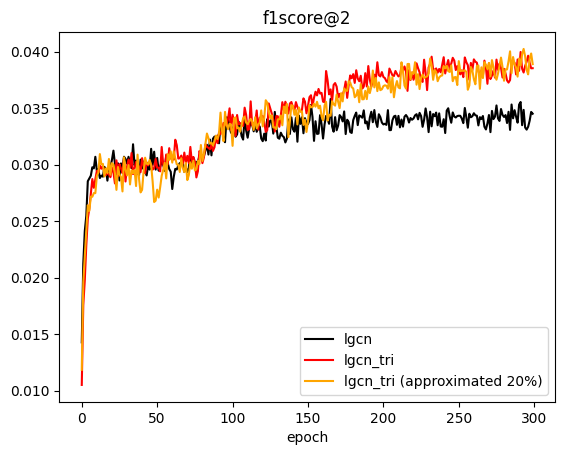

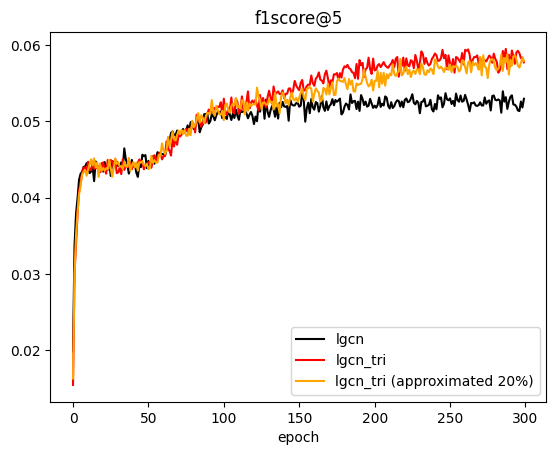

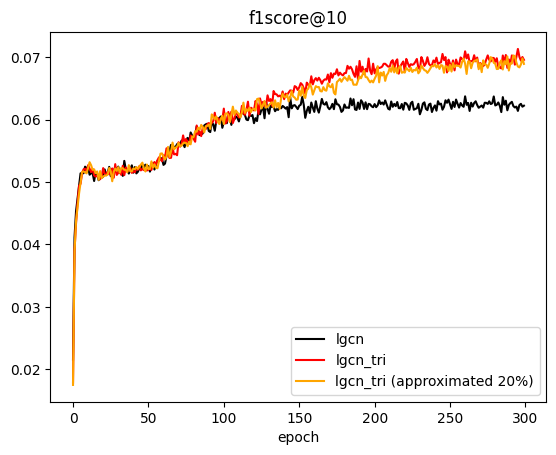

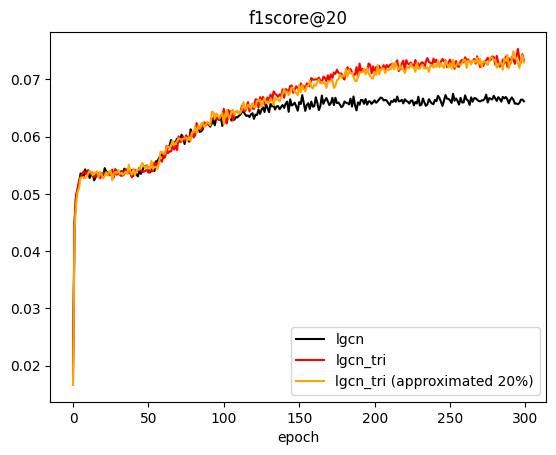

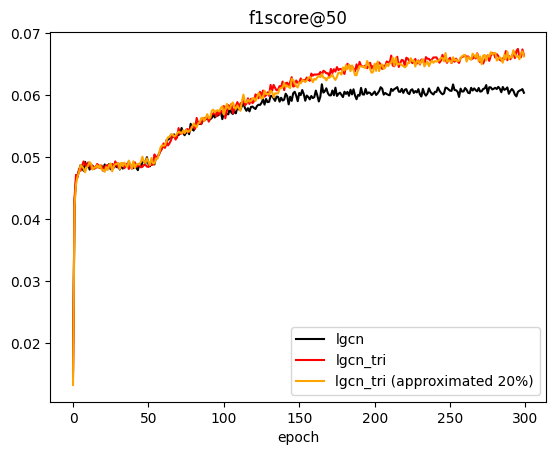

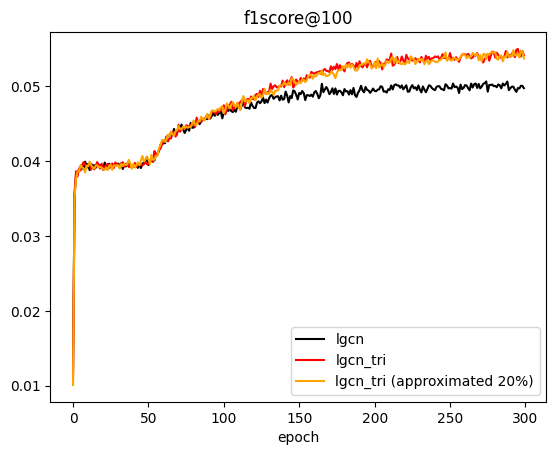

In [76]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_f1_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_005_f1_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_010_f1_dfs], axis=0)
a4 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_f1_dfs], axis=0)
a5 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_030_f1_dfs], axis=0)
a6 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_f1_dfs], axis=0)

print(f'a1(0%): {a1}')
print(f'a2(5%): {a2}')
print(f'a3(10%): {a3}')
print(f'a4(20%): {a4}')
print(f'a5(30%): {a5}')
print(f'a6(100%): {a6}')

print(f'approach (5%)\t improved rate from\t baseline: {a2/a1-1}')
print(f'approach (10%)\t improved rate from\t baseline: {a3/a1-1}')
print(f'approach (20%)\t improved rate from\t baseline: {a4/a1-1}')
print(f'approach (30%)\t improved rate from\t baseline: {a5/a1-1}')
print(f'full\t\t improved rate from\t baseline: {a6/a1-1}')

# print(f'full\t\t improved rate from\t approach: {a3/a2-1}')
# print(f'approach\t improved rate from\t full: {a2/a3-1}')

# 2. draw avg(f1) v.s. epoch number
for k in [2,5,10,20,50,100]:
    lgcn_f1_lines = [df[k].tolist() for df in lgcn_f1_dfs]
    lgcn_f1_mean = np.mean(lgcn_f1_lines, axis=0)
    plt.plot(lgcn_f1_mean, label='lgcn', color='black')
    # for line in lgcn_f1_lines:
    #     plt.plot(line, label='lgcn', color='b')

    lgcn_tri_f1_lines = [df[k].tolist() for df in lgcn_tri_f1_dfs]
    lgcn_tri_f1_mean = np.mean(lgcn_tri_f1_lines, axis=0)
    plt.plot(lgcn_tri_f1_mean, label='lgcn_tri', color='red')
    # for line in lgcn_tri_f1_lines:
    #     plt.plot(line, label='lgcn_tri', color='r')

    lgcn_tri_app_f1_lines = [df[k].tolist() for df in lgcn_tri_app_f1_dfs]
    lgcn_tri_app_f1_mean = np.mean(lgcn_tri_app_f1_lines, axis=0)
    plt.plot(lgcn_tri_app_f1_mean, label='lgcn_tri (approximated 20%)', color='orange')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_005_f1_lines = [df[k].tolist() for df in lgcn_tri_app_005_f1_dfs]
    # lgcn_tri_app_005_f1_mean = np.mean(lgcn_tri_app_005_f1_lines, axis=0)
    # plt.plot(lgcn_tri_app_005_f1_mean, label='lgcn_tri (approximated 5%)', color='yellow')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_010_f1_lines = [df[k].tolist() for df in lgcn_tri_app_010_f1_dfs]
    # lgcn_tri_app_010_f1_mean = np.mean(lgcn_tri_app_010_f1_lines, axis=0)
    # plt.plot(lgcn_tri_app_010_f1_mean, label='lgcn_tri (approximated 10%)', color='grey')
    # for line in lgcn_tri_app_f1_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')
    
    plt.legend()
    plt.title(f'f1score@{k}')
    plt.xlabel('epoch')
    plt.show()

#### 2. compare ndcg

In [309]:
lgcn_ndcg_dfs[1].max(), lgcn_tri_ndcg_dfs[1].max(), lgcn_tri_app_ndcg_dfs[1].max()

(Unnamed: 0    300.000000
 2               0.139849
 5               0.118875
 10              0.107421
 20              0.108279
 50              0.131500
 100             0.157473
 dtype: float64,
 Unnamed: 0    300.000000
 2               0.156737
 5               0.130420
 10              0.118775
 20              0.120592
 50              0.144869
 100             0.173121
 dtype: float64,
 Unnamed: 0    300.000000
 2               0.157449
 5               0.131086
 10              0.119295
 20              0.119373
 50              0.144994
 100             0.172896
 dtype: float64)

a1(0%): [0.14128734 0.11931014 0.10838902 0.10905965 0.13203153 0.15783186]
a2(5%): [0.15641113 0.12952382 0.1176526  0.118682   0.14246596 0.16969785]
a3(10%): [0.15655482 0.12990806 0.11778953 0.11910597 0.14331847 0.1712596 ]
a4(20%): [0.15881591 0.13201554 0.11981344 0.12033719 0.14477187 0.17228161]
a5(30%): [0.15665334 0.13100323 0.11888957 0.12015253 0.14474631 0.17253829]
a6(100%): [0.15698546 0.13187545 0.11972839 0.12063242 0.14513911 0.17319704]
approach (5%)	 improved rate from	 baseline: [0.10704278 0.08560617 0.08546599 0.08823011 0.07902987 0.07518117]
approach (10%)	 improved rate from	 baseline: [0.10805977 0.0888267  0.08672935 0.09211766 0.0854867  0.08507619]
approach (20%)	 improved rate from	 baseline: [0.12406327 0.10649055 0.105402   0.10340708 0.09649472 0.09155153]
approach (30%)	 improved rate from	 baseline: [0.10875707 0.09800585 0.09687833 0.10171383 0.09630112 0.0931778 ]
full		 improved rate from	 baseline: [0.11110772 0.10531638 0.1046173  0.10611411 0.

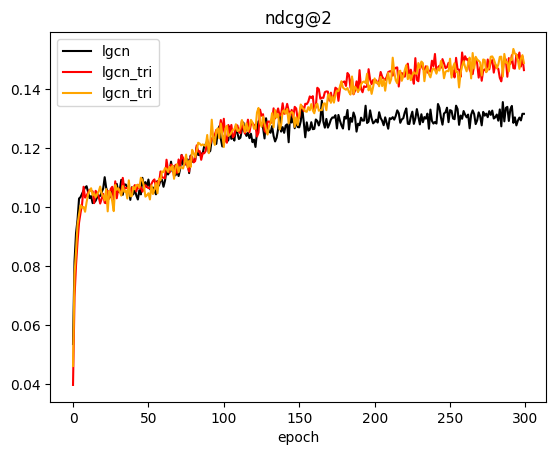

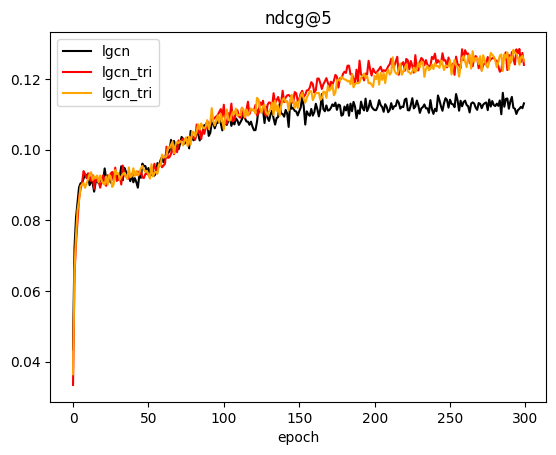

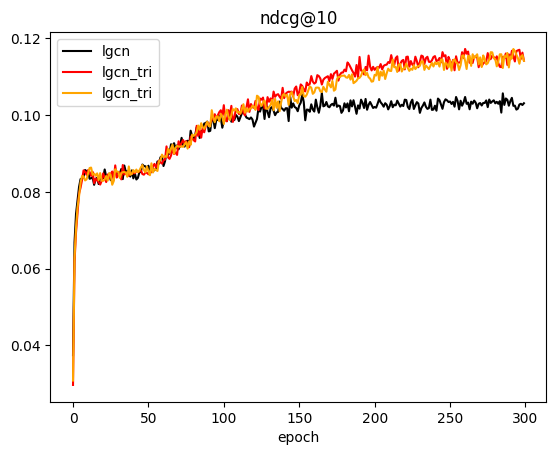

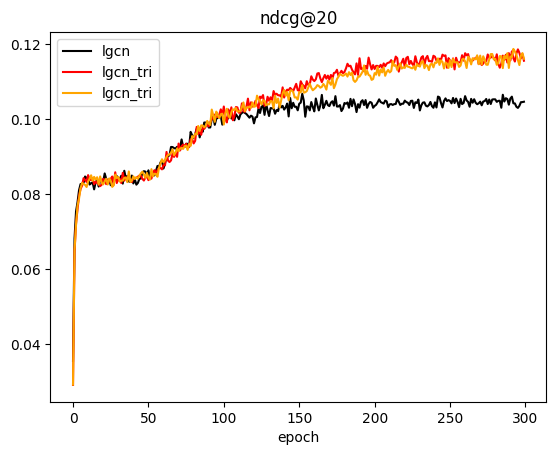

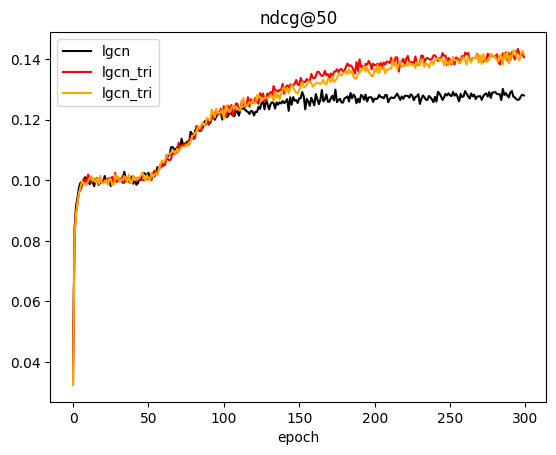

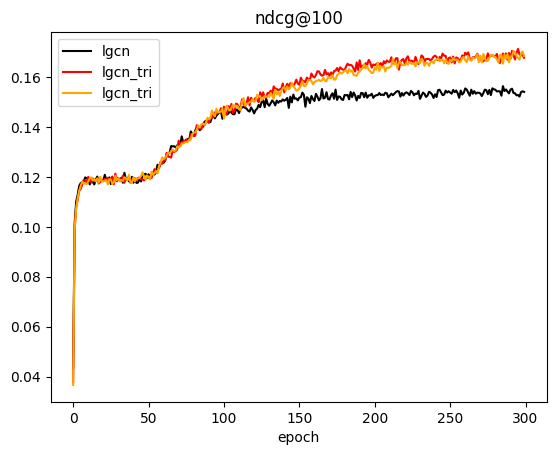

In [77]:
# 1. mean of max
a1 = np.mean([df.max().tolist()[1:] for df in lgcn_ndcg_dfs], axis=0)
a2 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_005_ndcg_dfs], axis=0)
a3 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_010_ndcg_dfs], axis=0)
a4 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_ndcg_dfs], axis=0)
a5 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_app_030_ndcg_dfs], axis=0)
a6 = np.mean([df.max().tolist()[1:] for df in lgcn_tri_ndcg_dfs], axis=0)

print(f'a1(0%): {a1}')
print(f'a2(5%): {a2}')
print(f'a3(10%): {a3}')
print(f'a4(20%): {a4}')
print(f'a5(30%): {a5}')
print(f'a6(100%): {a6}')

print(f'approach (5%)\t improved rate from\t baseline: {a2/a1-1}')
print(f'approach (10%)\t improved rate from\t baseline: {a3/a1-1}')
print(f'approach (20%)\t improved rate from\t baseline: {a4/a1-1}')
print(f'approach (30%)\t improved rate from\t baseline: {a5/a1-1}')
print(f'full\t\t improved rate from\t baseline: {a6/a1-1}')

# print(f'full improved rate from approach: {a3/a2-1}')
# print(f'approach improved rate from full: {a2/a3-1}')

# 2. draw avg(ndcg) v.s. epoch number
for k in [2,5,10,20,50,100]:
    lgcn_ndcg_lines = [df[k].tolist() for df in lgcn_ndcg_dfs]
    lgcn_ndcg_lines_mean = np.mean(lgcn_ndcg_lines, axis=0)
    plt.plot(lgcn_ndcg_lines_mean, label='lgcn', color='black')
    # for line in lgcn_ndcg_lines:
    #     plt.plot(line, label='lgcn', color='b')

    lgcn_tri_ndcg_lines = [df[k].tolist() for df in lgcn_tri_ndcg_dfs]
    lgcn_tri_ndcg_lines_mean = np.mean(lgcn_tri_ndcg_lines, axis=0)
    plt.plot(lgcn_tri_ndcg_lines_mean, label='lgcn_tri', color='red')
    # for line in lgcn_tri_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri', color='r')

    lgcn_tri_app_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_ndcg_dfs]
    lgcn_tri_app_ndcg_mean = np.mean(lgcn_tri_app_ndcg_lines, axis=0)
    plt.plot(lgcn_tri_app_ndcg_mean, label='lgcn_tri', color='orange')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_005_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_005_ndcg_dfs]
    # lgcn_tri_app_005_ndcg_mean = np.mean(lgcn_tri_app_005_ndcg_lines, axis=0)
    # plt.plot(lgcn_tri_app_005_ndcg_mean, label='lgcn_tri (approximated 5%)', color='yellow')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')

    # lgcn_tri_app_010_ndcg_lines = [df[k].tolist() for df in lgcn_tri_app_010_ndcg_dfs]
    # lgcn_tri_app_010_ndcg_mean = np.mean(lgcn_tri_app_010_ndcg_lines, axis=0)
    # plt.plot(lgcn_tri_app_010_ndcg_mean, label='lgcn_tri (approximated 10%)', color='grey')
    # for line in lgcn_tri_app_ndcg_lines:
    #     plt.plot(line, label='lgcn_tri (approximated)', color='orange')
    
    
    plt.legend()
    plt.title(f'ndcg@{k}')
    plt.xlabel('epoch')
    plt.show()

In [311]:
### page rank

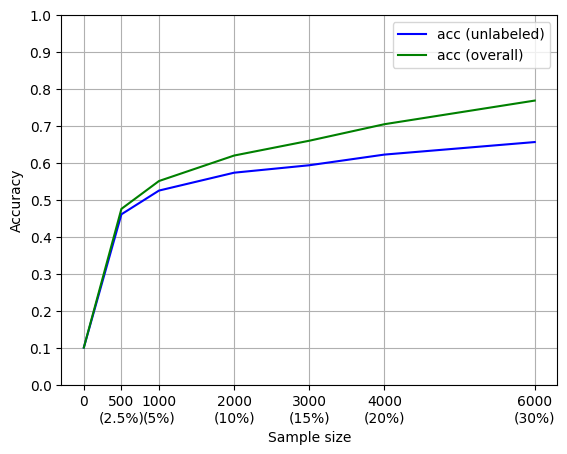

In [347]:
sample_sizes = [0, 500, 1000, 2000, 3000, 4000, 6000] # add 500
accs = [0.1, 0.460512, 0.524756, 0.573121, 0.593248, 0.622127, 0.656014]
overall_accs = [0.1, 0.475181, 0.550601, 0.619551, 0.659610, 0.704327, 0.768256]
plt.plot(sample_sizes, accs, 'b', label='acc (unlabeled)')
plt.plot(sample_sizes, overall_accs, 'g', label='acc (overall)')

plt.ylim(0,1.0)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(sample_sizes, ['0', '500\n(2.5%)', '1000\n(5%)', '2000\n(10%)', '3000\n(15%)', '4000\n(20%)', '6000\n(30%)'])
# plt.xticks(sample_sizes, ['(random)', '', '', '', '', '', ''], rotation=90)

plt.grid()
plt.legend()

plt.xlabel('Sample size')
plt.ylabel('Accuracy')

plt.show()

In [279]:
for exsl_path in ['MBA_LightGCN_20240518_1.xlsx', 'MBA_LightGCN_20240518_2.xlsx', 'MBA_LightGCN_20240518_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, light_gcn_dir + exsl_path)

F1_max: 0.110048: 100%|██████████| 300/300 [07:39<00:00,  1.53s/it]


time cost: 2.2992535177094395
Saving results...
Well saved.


F1_max: 0.098676: 100%|██████████| 300/300 [07:38<00:00,  1.53s/it]


time cost: 2.2946920749999116
Saving results...
Well saved.


F1_max: 0.101534: 100%|██████████| 300/300 [07:40<00:00,  1.54s/it]

time cost: 2.30342262250022
Saving results...
Well saved.


### Instacart LightGCN

In [263]:
res_dir = 'experiment_result/Instacart/'
# lgcn_dir = res_dir + "LGCN/"
# tri_lgcn_dir = res_dir + "LGCN_tri/"
# tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"
light_gcn_dir = res_dir + "LightGCN/"

In [264]:
light_gcn_dir

'experiment_result/Instacart/LightGCN/'

In [265]:
assert params.all_para[2] == 'LightGCN' # model
assert params.all_para[1] == 'Instacart' # dataset
read_data_res = read_data.read_all_data_lightGCN(params.all_para)
# print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading data...
Constructing the sparse graph...
Data all read successfully!
interaction number: 1058825
['0', 'Instacart', 'LightGCN', 0.005, 0.02, 2, 128, 40000, 4096, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'Adam', False, 'None', 'Sum', 128, 'SF', False]


In [266]:
for exsl_path in ['Instacart_LightGCN_20240518_1.xlsx', 'Instacart_LightGCN_20240518_2.xlsx', 'Instacart_LightGCN_20240518_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, light_gcn_dir + exsl_path)

F1_max: 0.028884:   0%|          | 1/300 [00:30<2:34:24, 30.99s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/sharkiefff/anaconda3/envs/dis-llm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/lh/1l1yxhh50vdcdltw404st9z80000gn/T/ipykernel_44204/3686641794.py", line 2, in <module>
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, light_gcn_dir + exsl_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sharkiefff/Desktop/NUS/Lab_Dissertation/LGCN/train_model.py", line None, in train_model
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/sharkiefff/anaconda3/envs/dis-llm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

### Amazon LightGCN: As a comparison

In [267]:
res_dir = 'experiment_result/Amazon/'
# lgcn_dir = res_dir + "LGCN/"
# tri_lgcn_dir = res_dir + "LGCN_tri/"
# tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"
light_gcn_dir = res_dir + "LightGCN/"

In [268]:
light_gcn_dir

'experiment_result/Amazon/LightGCN/'

In [272]:
assert params.all_para[2] == 'LightGCN' # model
assert params.all_para[1] == 'Amazon' # dataset
read_data_res = read_data.read_all_data(params.all_para)
# print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading data...
Constructing the sparse graph...
Data all read successfully!
interaction number: 279421
['0', 'Amazon', 'LightGCN', 0.005, 0.02, 2, 128, 40000, 4096, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'Adam', False, 'None', 'Sum', 128, 'SF', False]


In [273]:
for exsl_path in ['Amazon_LightGCN_20240518_1.xlsx', 'Amazon_LightGCN_20240518_2.xlsx', 'Amazon_LightGCN_20240518_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, light_gcn_dir + exsl_path)

F1_max: 0.017400: 100%|██████████| 300/300 [21:31<00:00,  4.31s/it]


time cost: 6.458653570835013
Saving results...
Well saved.


F1_max: 0.014320:  24%|██▎       | 71/300 [05:07<16:30,  4.32s/it]


KeyboardInterrupt: 

### MBA_LCFN

In [319]:
res_dir = 'experiment_result/MBA/'
# lgcn_dir = res_dir + "LGCN/"
# tri_lgcn_dir = res_dir + "LGCN_tri/"
# tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"
lcfn_dir = res_dir + "LCFN/"

In [320]:
lcfn_dir

'experiment_result/MBA/LCFN/'

In [321]:
os.chdir('./pretraining/')
! python3 _hypergraph_embeddings.py
os.chdir('../')

Reading data...
Initializing...
Constructing the laplacian matrices...
   constructing user matrix...
   constructing item matrix...
Decomposing the laplacian matrices...
   decomposing user matrix...
[-2.81143065e-17  3.53735307e-17  2.48771253e-01  4.94673718e-01
  7.23958618e-01  7.34077149e-01  7.43598297e-01  7.44887801e-01
  7.47894042e-01  7.63761946e-01]
   decomposing item matrix...
[-5.26337296e-19  7.41558550e-17  2.48771253e-01  4.94673718e-01
  7.23958618e-01  7.34077149e-01  7.43598297e-01  7.44887801e-01
  7.47894042e-01  7.63761946e-01]
Saving features...


In [322]:
assert params.all_para[2] == 'LCFN' # model
assert params.all_para[1] == 'MBA' # dataset
read_data_res = read_data.read_all_data_LCFN(params.all_para)
# print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading data...
Data all read successfully!
interaction number: 208956
['0', 'MBA', 'LCFN', 0.0005, 0.005, 1, 64, 10000, 512, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '2D_hyper_graph', 'InnerProduct', 'BPR', 'Regularization', 'Adam', False, 'None', 'Sum', 128, 'SF', False]


In [305]:
for exsl_path in ['MBA_LCFN_20240518_1.xlsx', 'MBA_LCFN_20240518_2.xlsx', 'MBA_LCFN_20240518_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, lcfn_dir + exsl_path)

F1_max: 0.075720: 100%|██████████| 300/300 [03:13<00:00,  1.55it/s]


time cost: 0.9687176754139364
Saving results...
Well saved.


F1_max: 0.075671: 100%|██████████| 300/300 [03:14<00:00,  1.54it/s]


time cost: 0.9713534539542161
Saving results...
Well saved.


F1_max: 0.075312: 100%|██████████| 300/300 [03:17<00:00,  1.52it/s]

time cost: 0.98569977812469
Saving results...
Well saved.


### Instacart_LCFN

In [325]:
res_dir = 'experiment_result/Instacart/'
# lgcn_dir = res_dir + "LGCN/"
# tri_lgcn_dir = res_dir + "LGCN_tri/"
# tri_lgcn_approximated_dir = res_dir + "LGCN_tri_approximated/"
lcfn_dir = res_dir + "LCFN/"

In [326]:
lcfn_dir

'experiment_result/Instacart/LCFN/'

In [327]:
os.chdir('./pretraining/')
! python3 _hypergraph_embeddings.py
os.chdir('../')

Reading data...
Initializing...
Constructing the laplacian matrices...
   constructing user matrix...
   constructing item matrix...
Decomposing the laplacian matrices...
   decomposing user matrix...
[-1.57747468e-16  3.47030250e-01  3.54220887e-01  4.13756589e-01
  4.37410450e-01  5.42919436e-01  5.71926100e-01  6.20621563e-01
  6.24649432e-01  6.25552459e-01]
   decomposing item matrix...
[6.04013309e-16 3.47030250e-01 3.54220887e-01 4.13756589e-01
 4.37410450e-01 5.42919436e-01 5.71926100e-01 6.20621563e-01
 6.24649432e-01 6.25552459e-01]
Saving features...


In [328]:
assert params.all_para[2] == 'LCFN' # model
assert params.all_para[1] == 'Instacart' # dataset
read_data_res = read_data.read_all_data_LCFN(params.all_para)
# print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading data...
Data all read successfully!
interaction number: 1058825
['0', 'Instacart', 'LCFN', 0.0005, 0.005, 1, 64, 40000, 4096, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '2D_hyper_graph', 'InnerProduct', 'BPR', 'Regularization', 'Adam', False, 'None', 'Sum', 128, 'SF', False]


In [329]:
for exsl_path in ['Instacart_LCFN_20240518_1.xlsx', 'Instacart_LCFN_20240518_2.xlsx', 'Instacart_LCFN_20240518_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, lcfn_dir + exsl_path)

F1_max: 0.040433: 100%|██████████| 300/300 [22:08<00:00,  4.43s/it]


time cost: 6.6434138691658156
Saving results...
Well saved.


F1_max: 0.039033: 100%|██████████| 300/300 [22:06<00:00,  4.42s/it]


time cost: 6.63416488124989
Saving results...
Well saved.


F1_max: 0.039757: 100%|██████████| 300/300 [21:50<00:00,  4.37s/it]

time cost: 6.554114633540157
Saving results...
Well saved.


## Generate necessary result for AB test

### Generate recommendation for LGCN

In [34]:
res_dir = "experiment_result/MBA/"
lgcn_dir = res_dir + "LGCN/"
tri_lgcn_dir = res_dir + "LGCN_tri/"
tri_lgcn_approach_dir = res_dir + "LGCN_tri_approach/"
AB_test_dir = res_dir + "AB_test/"

In [35]:
import os

In [36]:
os.chdir('./pretraining/')
! python3 _graph_embeddings.py
os.chdir('../')

Reading data...
Initializing...
Constructing the laplacian matrices...
Decomposing the laplacian matrices...
[3.03680776e-16 1.08279901e-15 1.33265469e-01 2.89136945e-01
 4.74603595e-01 4.84322920e-01 4.93638762e-01 4.94913672e-01
 4.97898459e-01 5.13956736e-01]
Saving features...


In [37]:
assert params.all_para[2] == 'LGCN' # model
assert params.all_para[1] == 'MBA' # dataset
read_data_res = read_data.read_all_data_tri(params.all_para, approximate=True)
print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading graph_embeddings_1d from path: dataset/MBA/graph_embeddings_1d.json
Reading data...
Data all read successfully!
pretrained embedding size: (8143, 128)
interaction number: 208956
['0', 'MBA', 'LGCN', 0.0005, 0.02, 1, 128, 10000, 4297, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'RMSProp', False, 'None', 'Sum', 128, 'SF', False]


In [41]:
for exsl_path in ['Instacart_LGCN_tri_approximated_20240515_3.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, AB_test_dir + exsl_path)

F1_max: 0.072751: 100%|██████████| 300/300 [05:47<00:00,  1.16s/it]


time cost: 1.7370794787502382
Saving results...
Well saved.


### Generate recommendation for LGCN_tri

In [42]:
os.chdir('./pretraining/')
! python3 _graph_embeddings_tri.py
os.chdir('../')

Reading data...
20
Initializing...
Constructing the laplacian matrices...
Decomposing the laplacian matrices...
[4.09697598e-06 5.08808731e-01 5.12672647e-01 5.70596606e-01
 5.86303712e-01 5.95015195e-01 6.04698785e-01 6.19514997e-01
 6.33501159e-01 6.37257716e-01]
Saving features...


In [48]:
assert params.all_para[2] == 'LGCN_tri' # model
assert params.all_para[1] == 'MBA' # dataset
read_data_res = read_data.read_all_data_tri(params.all_para, approximate=True)
print(f'pretrained embedding size: {read_data_res[8].shape}')
print(f'interaction number: {np.sum([len(v) for v in read_data_res[0]])}')
print(params.all_para)

Reading graph_embeddings_1d from path: dataset/MBA/graph_embeddings_1d_tri_approach.json
Reading data...
Data all read successfully!
pretrained embedding size: (8163, 128)
interaction number: 208956
['0', 'MBA', 'LGCN_tri', 0.0005, 0.02, 1, 128, 10000, 4297, 300, False, 'Validation', [2, 5, 10, 20, 50, 100], 100, 50, 128, 0.9, 1, '1D', 'InnerProduct', 'BPR', 'Regularization', 'RMSProp', False, 'None', 'Sum', 128, 'SF', False]


In [49]:
for exsl_path in ['MBA_LGCN_tri_20240515_1.xlsx']:
    F1_max = train_model.train_model(params.all_para[:26], read_data_res, AB_test_dir + exsl_path)

F1_max: 0.081426: 100%|██████████| 300/300 [06:00<00:00,  1.20s/it]


time cost: 1.8003504706243985
Saving results...
Well saved.
